In [4]:
import time
# print current time
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))

2025-06-03 15:24:35


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from numpy import genfromtxt
my_data = genfromtxt('dataA.csv', delimiter=',')[1:]

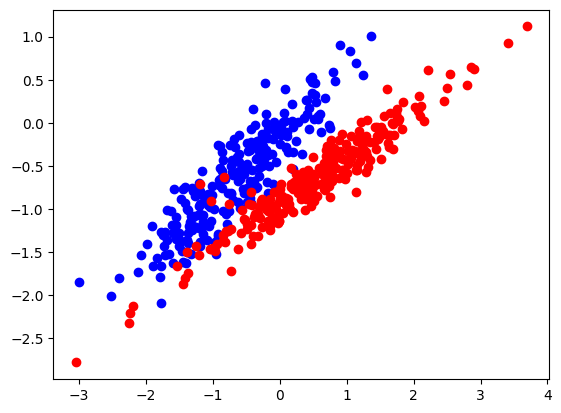

In [7]:
sig_mask = my_data[:, 2] == 1
noise_mask = my_data[:, 2] == 0
plt.scatter(my_data[noise_mask][:, 0], my_data[:, 1][noise_mask], color='blue')
plt.scatter(my_data[sig_mask][:, 0], my_data[:, 1][sig_mask], color='red')

In [8]:
cut = 0
my_label = my_data[:, 1] <= cut

sig_eff = my_label[sig_mask].sum()/sig_mask.sum()
print(sig_eff)
bkg_rej = (1 - my_label[noise_mask].sum()/noise_mask.sum())
print(bkg_rej)

0.8976377952755905
0.1428571428571429


0.984251968503937
0.8040816326530612


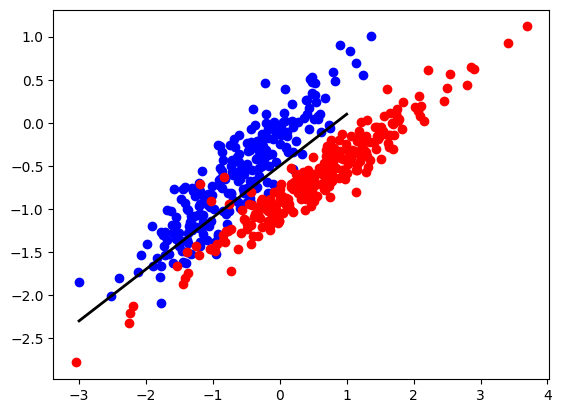

In [14]:
k = 0.6
l = -0.5

def linear(x):
    return k*x + l

my_label = my_data[:, 1] <= k*my_data[:, 0] + l

plt.scatter(my_data[noise_mask][:, 0], my_data[:, 1][noise_mask], color='blue')
plt.scatter(my_data[sig_mask][:, 0], my_data[:, 1][sig_mask], color='red')
plt.plot(np.linspace(-3, 1, 100), linear(np.linspace(-3, 1, 100)), lw=2, color='black')
sig_eff = my_label[sig_mask].sum()/sig_mask.sum()
print(sig_eff)
bkg_rej = (1 - my_label[noise_mask].sum()/noise_mask.sum())
print(bkg_rej)

0.8941668005784991


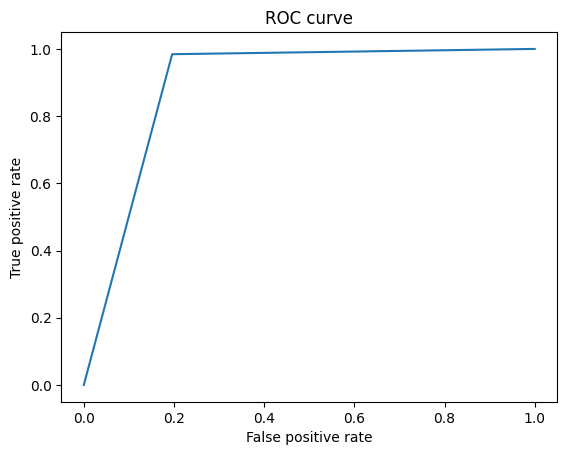

In [16]:
from scipy.integrate import trapezoid

def roc_auc(y, y_pred):
    sig_eff = my_label[sig_mask].sum()/sig_mask.sum()
    fp = my_label[noise_mask].sum()/noise_mask.sum()
    
    x_roc = [0, fp, 1]
    y_roc = [0, sig_eff, 1]
    # print(x_roc, y_roc)
    
    # plot ROC curve nicely
    plt.plot(x_roc, y_roc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    
    # iintegrate to get AUC
    auc = trapezoid(y=y_roc, x=x_roc, dx=0.1)
    # print AUC on plot
    #plt.text(0.5, 0.5, 'AUC = %.2f' % auc, fontsize=12)
    return auc
 
print(roc_auc(my_data[:, 2], my_label))

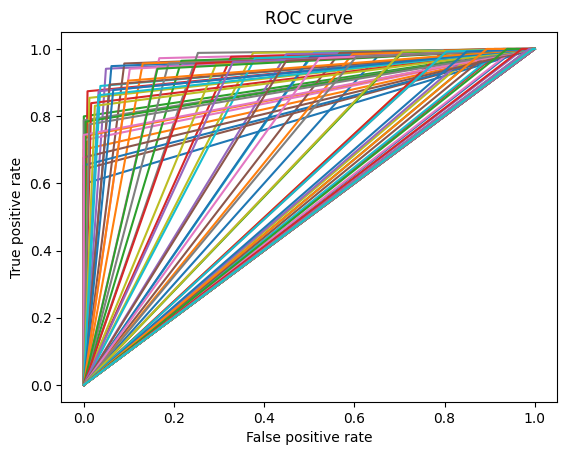

In [11]:
ks = []
ls = []
aucs = []
i= 0
for k in np.arange(0.8, 1.2, 0.1):
    for l in np.arange(-1, 1.5, 0.1):
        i+=1
        my_label = my_data[:, 1] <= linear(my_data[:,0])
        auc = roc_auc(my_data[:, 2], my_label)
        ks.append(k)
        ls.append(l)
        aucs.append(auc)


In [12]:
np.argmax(aucs)
#max(aucs)

4

In [13]:
print(ks[4], ls[4], aucs[4])

0.8 -0.6000000000000001 0.9459826450265145
